In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, kruskal
from math import sqrt

from scripts_python import wrangle
from scripts_python import explore


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

# Plot #1:

**In mvp-sa section Hypothesis testing, 1st plot, would like this side by side SA and Dallas
explore.sns_boxplot(train_exp)**


In [10]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)
Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


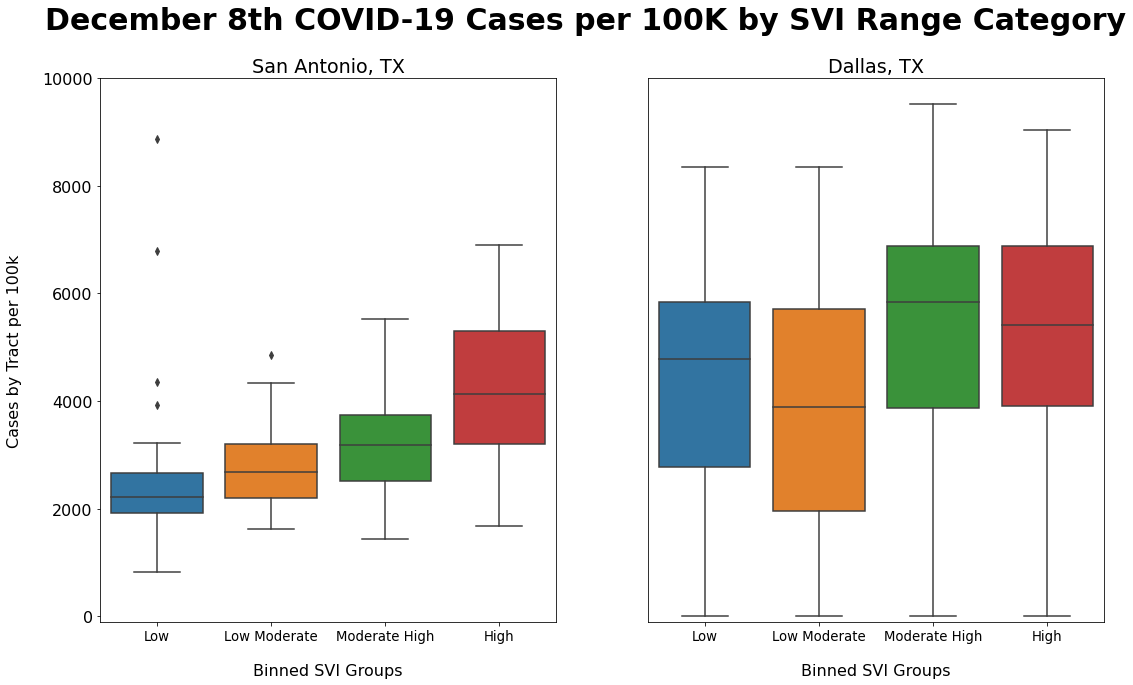

In [11]:

fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.rc('font', size=16)
plt.suptitle('December 8th COVID-19 Cases per 100K by SVI Range Category', fontsize=30, fontweight = 'bold')
axes[0].set_title('San Antonio, TX')
axes[1].set_title('Dallas, TX')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
ax1 = sns.boxplot(ax=axes[0], 
            data=train_exp, 
            x='bin_svi', 
            y='tract_cases_per_100k')
ax1.set_ylim([-100, 10000])
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel("Binned SVI Groups",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
ax2 = sns.boxplot(ax=axes[1], 
            data=train_exp, 
            x='bin_svi', 
            y='tract_cases_per_100k')
ax2.set_ylim([-100, 10000])
ax2.yaxis.set_visible(False)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel("Binned SVI Groups",labelpad=20)

plt.show()
hide_toggle()

# Plot # 2:
**same with 2nd plot in that section
explore.joint_plot_index('raw_svi','tract_cases_per_100k', train_exp, 'bin_svi')**

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)
Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


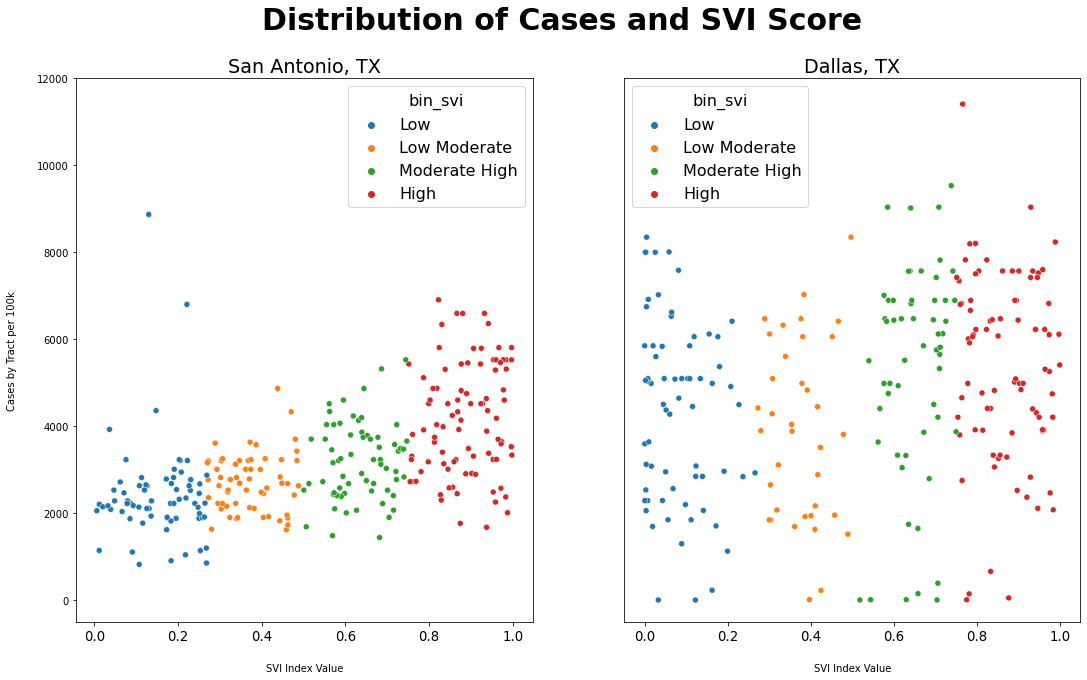

In [3]:

fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.rc('font', size=16)
plt.suptitle('Distribution of Cases and SVI Score', fontsize=30, fontweight = 'bold')
axes[0].set_title('San Antonio, TX')
axes[1].set_title('Dallas, TX')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
ax1 = sns.scatterplot(ax = axes[0],
                      x = 'raw_svi', 
                      y = 'tract_cases_per_100k', 
                      data = train_exp, 
                      hue = 'bin_svi')
ax1.set_ylim([-500,12000])
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel("SVI Index Value",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
ax2 = sns.scatterplot(ax = axes[1],
                      x = 'raw_svi', 
                      y = 'tract_cases_per_100k', 
                      data = train_exp, 
                      hue = 'bin_svi')
ax2.set_ylim([-500,12000])
ax2.yaxis.set_visible(False)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel("SVI Index Value",labelpad=20)

plt.show()


# Plot #3:

**The the distribution of cases, explore.hist_case(train_exp.tract_cases_per_100k)**

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)
Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


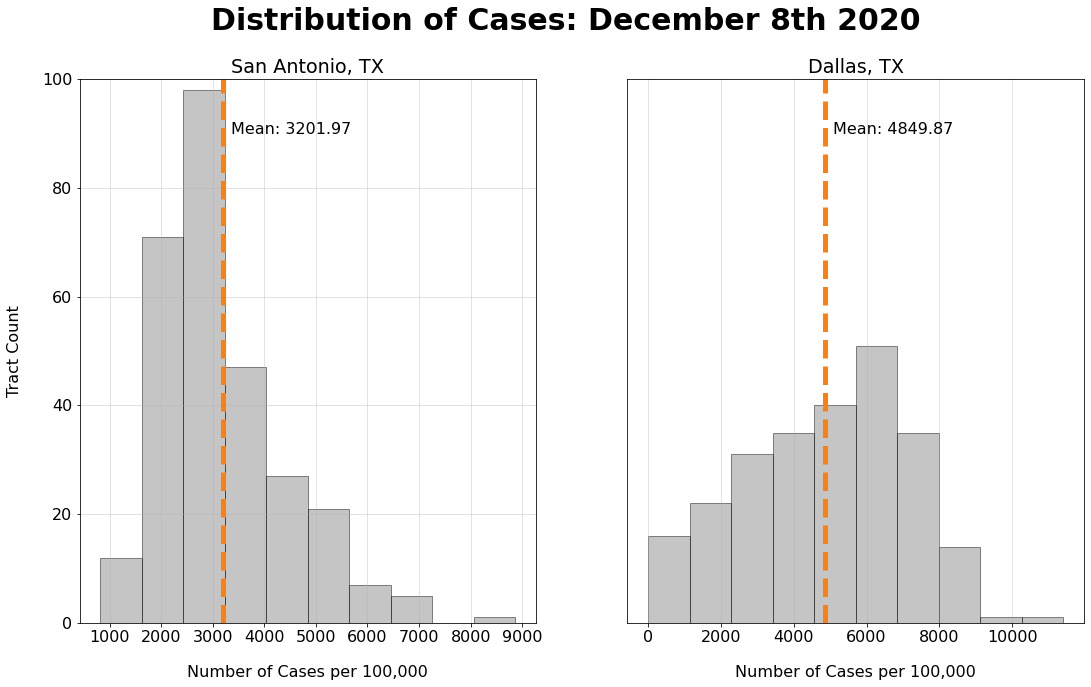

In [6]:
## Code to Change
fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.rc('font', size=16)
plt.suptitle('Distribution of Cases: December 8th 2020', fontsize=30, fontweight = 'bold')
#axes[0].set_title('San Antonio, TX')
#axes[1].set_title('Dallas, TX')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
plt.subplot(1,2,1)
plt.hist(x = train_exp.tract_cases_per_100k, 
               bins = 10, color = 'gray', 
               edgecolor='k', 
               alpha=0.45)
plt.title('San Antonio, TX')
plt.ylim(0, 100)
plt.ylabel('Tract Count',labelpad=20)
plt.xlabel('Number of Cases per 100,000',labelpad=20)
plt.axvline(train_exp.tract_cases_per_100k.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
min_ylim_v, max_ylim_v = plt.ylim()
plt.text(train_exp.tract_cases_per_100k.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(train_exp.tract_cases_per_100k.mean()))
plt.grid(b = True, alpha = .45)


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
plt.subplot(1,2,2)
plt.hist(x = train_exp.tract_cases_per_100k, 
               bins = 10, color = 'gray', 
               edgecolor='k', 
               alpha=0.45)
plt.yticks([])
plt.title('Dallas, TX')
plt.ylim(0, 100)
plt.xlabel('Number of Cases per 100,000',labelpad=20)
plt.axvline(train_exp.tract_cases_per_100k.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
min_ylim_v, max_ylim_v = plt.ylim()
plt.text(train_exp.tract_cases_per_100k.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(train_exp.tract_cases_per_100k.mean()))
plt.grid(b = True, alpha = .45)
plt.show()


# Plot #4:
**explore.cluster_scatter, 3 for sa and 3 for dallas**

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(20, 15))
plt.rc('font', size=16)
plt.suptitle('Sum of Flags for Socioeconomic Themes by Number of Cases per 100k', fontsize=30, fontweight = 'bold')
axes[0,0].set_title('Sum of Socioeconomic Themes (San Antonio, TX)')
axes[1,0].set_title('Persons Below Poverty (San Antonio, TX)')
axes[2,0].set_title('Percent Persons Below Poverty (San Antonio, TX)')

axes[0,1].set_title('Sum of Socioeconomic Themes (Dallas, TX)')
axes[1,1].set_title('Persons Below Poverty (Dallas, TX)')
axes[2,1].set_title('Percent Persons Below Poverty (Dallas, TX)')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
ax1 = sns.scatterplot(ax = axes[0,0],
                      x= 'spl_theme1', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax1.set_ylim([-1000, 15000])
ax1.xaxis.set_visible(True)
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel(" ",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


ax2 = sns.scatterplot(ax = axes[1,0],
                      x= 'e_pov', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax2.set_ylim([-1000, 15000])
ax2.xaxis.set_visible(True)
ax2.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel(" ",labelpad=20)

ax3 = sns.scatterplot(ax = axes[2,0],
                      x= 'ep_pov', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax3.set_ylim([-1000, 15000])
ax3.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax3.tick_params(axis ='x', labelsize ='small')
ax3.set_xlabel("SVI Index Value",labelpad=20)

#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()

ax4 = sns.scatterplot(ax = axes[0,1],
                      x= 'spl_theme1', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax4.set_ylim([-1000, 15000])
ax4.xaxis.set_visible(True)
ax4.yaxis.set_visible(False)
ax4.tick_params(axis ='x', labelsize ='small')
ax4.set_xlabel(" ",labelpad=20)

ax5 = sns.scatterplot(ax = axes[1,1],
                      x= 'e_pov', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax5.set_ylim([-1000, 15000])
ax5.xaxis.set_visible(True)
ax5.yaxis.set_visible(False)
ax5.tick_params(axis ='x', labelsize ='small')
ax5.set_xlabel(" ",labelpad=20)

ax6 = sns.scatterplot(ax = axes[2,1],
                      x= 'ep_pov', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax6.set_ylim([-1000, 15000])
ax6.yaxis.set_visible(False)
ax6.tick_params(axis ='x', labelsize ='small')
ax6.set_xlabel("SVI Index Value",labelpad=20)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.rc('font', size=16)
plt.suptitle('Distribution of Cases and SVI Score', fontsize=30, fontweight = 'bold')
axes[0].set_title('San Antonio, TX')
axes[1].set_title('Dallas, TX')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
ax1 = sns.lm
plot(ax = axes[0],
                      x = 'raw_svi', 
                      y = 'tract_cases_per_100k', 
                      data = train_exp, 
                      hue = 'bin_svi')
ax1.set_ylim([-500,12000])
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel("SVI Index Value",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
ax2 = sns.lmplot(ax = axes[1],
                      x = 'raw_svi', 
                      y = 'tract_cases_per_100k', 
                      data = train_exp, 
                      hue = 'bin_svi')
ax2.set_ylim([-500,12000])
ax2.yaxis.set_visible(False)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel("SVI Index Value",labelpad=20)

plt.show()

